In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 70295 files belonging to 38 classes.


In [5]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [6]:
training_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

In [7]:
for x,y in training_set:
    print(x,x.shape)
    print(y,y.shape)
    break

tf.Tensor(
[[[[ 74.75  64.75  77.75]
   [164.75 153.75 167.75]
   [140.5  129.5  143.5 ]
   ...
   [ 98.5   81.5   97.5 ]
   [124.75 107.75 123.75]
   [ 97.    80.    96.  ]]

  [[103.75  94.   106.75]
   [153.5  142.5  156.5 ]
   [138.   127.   141.  ]
   ...
   [123.75 106.75 122.75]
   [109.    92.   108.  ]
   [107.    90.   106.  ]]

  [[ 67.25  57.5   70.25]
   [153.75 142.75 156.75]
   [149.   138.   152.  ]
   ...
   [110.    93.   109.  ]
   [116.5   99.5  115.5 ]
   [107.    90.   106.  ]]

  ...

  [[ 90.5   81.75  93.5 ]
   [160.75 149.75 163.75]
   [170.   159.   173.  ]
   ...
   [124.5  110.5  125.5 ]
   [105.25  91.25 106.25]
   [113.    99.   114.  ]]

  [[106.25  96.5  109.25]
   [181.   170.   184.  ]
   [155.25 144.25 158.25]
   ...
   [114.   100.   115.  ]
   [105.25  91.25 106.25]
   [102.75  88.75 103.75]]

  [[ 94.    84.    97.  ]
   [181.5  170.5  184.5 ]
   [181.25 170.25 184.25]
   ...
   [116.5  102.5  117.5 ]
   [127.75 113.75 128.75]
   [138.25 124.25 13

In [27]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout
from tensorflow.keras.models import Sequential

In [28]:
model=Sequential()

In [29]:
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

C:\Users\kushal\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [31]:
model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=64,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [32]:
model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=128,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [33]:
model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=256,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [34]:
model.add(Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=512,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [36]:
model.add(Dropout(0.25))

In [37]:
model.add(Flatten())

In [38]:
model.add(Dense(units=1500,activation='relu'))


In [39]:
model.add(Dropout(0.4))

In [40]:
# output layer
model.add(Dense(units=38,activation='softmax'))

In [41]:
import tensorflow as tf

optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])


In [42]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)                    │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 126, 126, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 63, 63, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 61, 61, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 30, 30, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 28, 28, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 14, 14, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 6, 6, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1500)                │       3,073,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 1500)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 38)                  │          57,038 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,842,762 (29.92 MB)

 Trainable params: 7,842,762 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

In [44]:
training_history=model.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1790s 813ms/step - accuracy: 0.3950 - loss: 2.1483 - val_accuracy: 0.8260 - val_loss: 0.5497
Epoch 2/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1758s 798ms/step - accuracy: 0.8337 - loss: 0.5313 - val_accuracy: 0.9181 - val_loss: 0.2674
Epoch 3/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1769s 804ms/step - accuracy: 0.9078 - loss: 0.2915 - val_accuracy: 0.9387 - val_loss: 0.1871
Epoch 4/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1796s 817ms/step - accuracy: 0.9338 - loss: 0.2021 - val_accuracy: 0.9478 - val_loss: 0.1595
Epoch 5/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1794s 813ms/step - accuracy: 0.9535 - loss: 0.1433 - val_accuracy: 0.9540 - val_loss: 0.1417
Epoch 6/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1754s 797ms/step - accuracy: 0.9635 - loss: 0.1108 - val_accuracy: 0.9608 - val_loss: 0.1277
Epoch 7/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1786s 812ms/step - accuracy: 0.9694 - loss: 0.0951 - val_accuracy: 0.9566 - val_loss: 0.1424
Epoch 8/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1755s 795ms/s

In [45]:
train_loss,train_acc=model.evaluate(training_set)

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 648s 294ms/step - accuracy: 0.9941 - loss: 0.0175


In [46]:
print(train_loss,train_acc)

0.015615939162671566 0.9949072003364563


In [47]:
val_loss,val_acc=model.evaluate(validation_set)

550/550 ━━━━━━━━━━━━━━━━━━━━ 123s 212ms/step - accuracy: 0.9736 - loss: 0.0902


In [48]:
print(val_loss,val_acc)

0.08789415657520294 0.9738219976425171


In [50]:
model.save("training_model.keras")

In [54]:
training_history.history

{'accuracy': [0.5924603343009949,
  0.857372522354126,
  0.914631187915802,
  0.9387723207473755,
  0.9558717012405396,
  0.965772807598114,
  0.9711928367614746,
  0.977110743522644,
  0.9786897897720337,
  0.9833985567092896],
 'loss': [1.3819466829299927,
  0.4522659182548523,
  0.26498207449913025,
  0.18613460659980774,
  0.13418695330619812,
  0.1043066456913948,
  0.08840437978506088,
  0.07072201371192932,
  0.06481751054525375,
  0.053162578493356705],
 'val_accuracy': [0.8259731531143188,
  0.918108344078064,
  0.9386523962020874,
  0.9478147029876709,
  0.9539608359336853,
  0.9607899188995361,
  0.9565786719322205,
  0.9504324793815613,
  0.9541884660720825,
  0.9738219976425171],
 'val_loss': [0.5497129559516907,
  0.2673802971839905,
  0.18705394864082336,
  0.15952222049236298,
  0.1416640430688858,
  0.12773537635803223,
  0.142365500330925,
  0.15436120331287384,
  0.15400254726409912,
  0.08789411932229996]}

In [55]:
import json
with open("training_hist.json","w") as f:
    json.dump(training_history.history,f)

In [56]:
epochs = [i for i in range(1,11)]

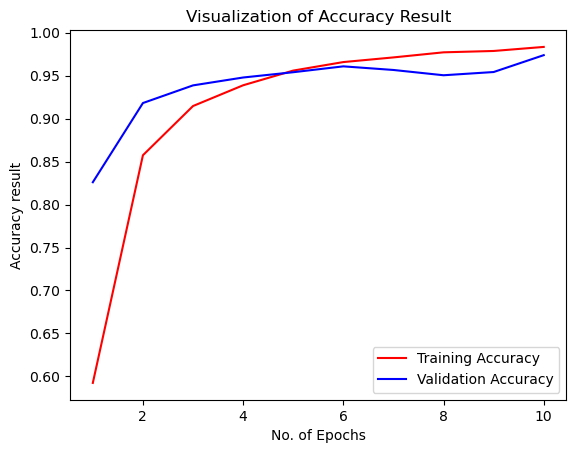

In [60]:
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.ylabel('Accuracy result')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

In [61]:
class_name = validation_set.class_names

In [62]:
print(class_name)

['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Sp

In [63]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [64]:
y_pred=model.predict(test_set)

17572/17572 ━━━━━━━━━━━━━━━━━━━━ 249s 14ms/step


In [68]:
len(y_pred)

17572

In [67]:
len(y_pred[0])

38

In [69]:
predicted_categories=tf.argmax(y_pred,axis=1)  #calculating the max value and storing the indices

In [70]:
predicted_categories #theses are indices

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [76]:
for x,y in test_set:
    print(y)
    break
  
  

tf.Tensor(
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]], shape=(1, 38), dtype=float32)


In [78]:
true_categories = tf.concat([y for x, y in test_set], axis=0)

Y_true = tf.argmax(true_categories, axis=1) #extracing the index of max

In [79]:
true_categories

<tf.Tensor: shape=(17572, 38), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [80]:
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [81]:
from sklearn.metrics import confusion_matrix,classification_report

In [82]:
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.98      0.97      0.98       504
                                 Apple___Black_rot       0.99      0.99      0.99       497
                          Apple___Cedar_apple_rust       0.95      1.00      0.97       440
                                   Apple___healthy       0.98      0.97      0.98       502
                               Blueberry___healthy       0.98      0.97      0.98       454
          Cherry_(including_sour)___Powdery_mildew       0.98      1.00      0.99       421
                 Cherry_(including_sour)___healthy       0.97      1.00      0.98       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.97      0.90      0.93       410
                       Corn_(maize)___Common_rust_       1.00      1.00      1.00       477
               Corn_(maize)___Northern_Leaf_Blight       0.94      0.98      0.